In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'panzdas'

In [3]:
df = pd.read_csv('C:/Users/Prashant/Documents/Machine Learing Workspace/Car Prediction/car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
#Removing unnecessary columns
df.drop('Car_Name', axis=1 , inplace=True)
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [28]:
from datetime import date
curr_year = date.today().year
curr_year

2021

In [29]:
df['Year'] = curr_year - df['Year']
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,7,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,8,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,4,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,10,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,7,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           301 non-null    int64  
 1   Selling_Price  301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Seller_Type    301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 18.9+ KB


In [7]:
#One hot encoding
encoding_col = ['Transmission','Seller_Type','Fuel_Type']

# generate binary values using get_dummies
dum_df = pd.get_dummies(df, columns=encoding_col, drop_first=True)
dum_df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Transmission_Manual,Seller_Type_Individual,Fuel_Type_Diesel,Fuel_Type_Petrol
0,2014,3.35,5.59,27000,0,1,0,0,1
1,2013,4.75,9.54,43000,0,1,0,1,0
2,2017,7.25,9.85,6900,0,1,0,0,1
3,2011,2.85,4.15,5200,0,1,0,0,1
4,2014,4.60,6.87,42450,0,1,0,1,0


In [8]:
#Pearson's correlation matrix
df_corr =dum_df.corr()
df_corr.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Transmission_Manual,Seller_Type_Individual,Fuel_Type_Diesel,Fuel_Type_Petrol
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104,0.000394,-0.039896,0.064315,-0.059959
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344,-0.367128,-0.550724,0.552339,-0.540571
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057,-0.348715,-0.512030,0.473306,-0.465244
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216,-0.162510,-0.101419,0.172515,-0.172874
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000,-0.050316,0.124269,-0.053469,0.055687


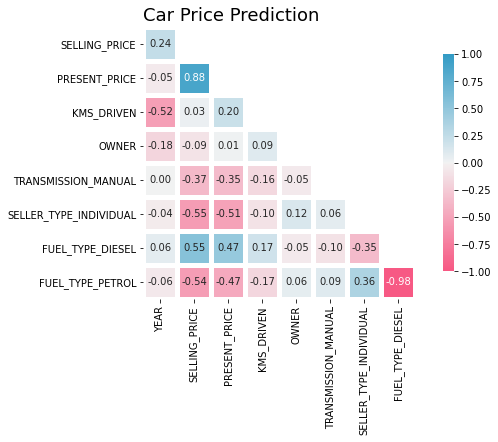

In [9]:
#Correlation matrix plot
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 5))
# mask
mask = np.triu(np.ones_like(df_corr, dtype=bool))
# adjust mask and df
mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()
# color map
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
# plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", 
           linewidths=5, cmap=cmap, vmin=-1, vmax=1, 
           cbar_kws={"shrink": .8}, square=True)
# ticks
yticks = [i.upper() for i in corr.index]
xticks = [i.upper() for i in corr.columns]
plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
plt.xticks(plt.xticks()[0], labels=xticks)
# title
title = 'Car Price Prediction'
plt.title(title, loc='left', fontsize=18)
plt.show()

In [10]:
dum_df.columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner',
       'Transmission_Manual', 'Seller_Type_Individual', 'Fuel_Type_Diesel',
       'Fuel_Type_Petrol'],
      dtype='object')

In [11]:
#Splitting feature and label variable separately for feature selection
X = dum_df[['Year', 'Present_Price', 'Kms_Driven', 'Owner',
       'Transmission_Manual', 'Seller_Type_Individual', 'Fuel_Type_Diesel',
       'Fuel_Type_Petrol']]
y = dum_df[['Selling_Price']]

#Using extatreeregressor to find highly affecting variable
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X, y.values.ravel())
print(model.feature_importances_)

# Normalizing the individual importances
feature_importance_normalized = np.std([model.feature_importances_ for tree in 
                                        model.estimators_],
                                        axis = 0)
feature_importance_normalized

[0.07666547 0.37512309 0.04034683 0.00042394 0.14850295 0.12386601
 0.22796226 0.00710945]


array([1.94289029e-16, 2.77555756e-16, 8.32667268e-17, 7.58941521e-19,
       1.66533454e-16, 6.93889390e-17, 4.44089210e-16, 6.93889390e-18])

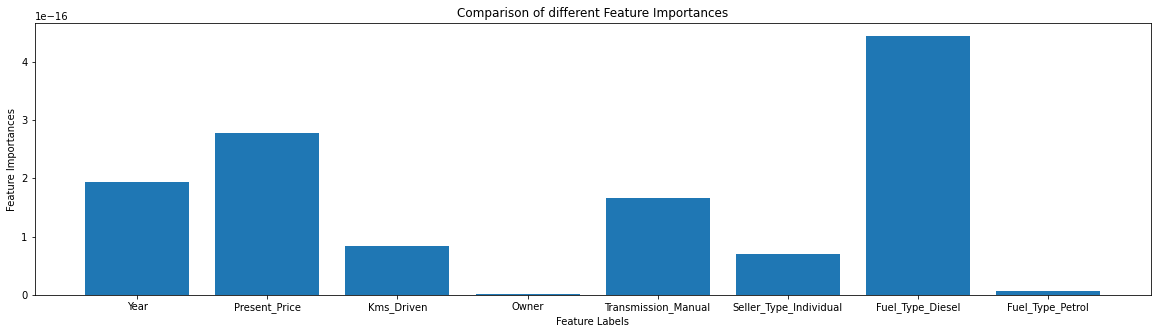

In [12]:
# Plotting a Bar Graph to compare the models
fig, ax = plt.subplots(figsize=(20, 5))
plt.bar(X.columns, feature_importance_normalized)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()

In [13]:
features = X
labels = y

# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [14]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (225, 8)
Training Labels Shape: (225, 1)
Testing Features Shape: (76, 8)
Testing Labels Shape: (76, 1)


In [15]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels.values.ravel())

In [16]:
# Use the random forest predict method on the test data
predictions = rf.predict(test_features)
n_row = predictions.shape[0]
predictions = predictions.reshape(n_row,1)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
mae= round(np.mean(errors), 2)
print('Mean Absolute Error:',mae)

Mean Absolute Error: Selling_Price    0.58
dtype: float64


In [17]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: Selling_Price    82.8
dtype: float64 %.


In [32]:
X.dtypes

Year                        int64
Present_Price             float64
Kms_Driven                  int64
Owner                       int64
Transmission_Manual         uint8
Seller_Type_Individual      uint8
Fuel_Type_Diesel            uint8
Fuel_Type_Petrol            uint8
dtype: object

In [19]:
y.columns

Index(['Selling_Price'], dtype='object')

In [31]:
# save the model to disk
import pickle
filename = 'fin_random_forest_model.pkl'
pickle.dump(rf, open(filename, 'wb'))